In [3]:
!pip install modAL-python

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [9]:
import numpy as np

from modal.models import ActiveLearner 
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
n_initial = 100

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [11]:
learner = ActiveLearner( 
    estimator=RandomForestClassifier(), 
    query_strategy=uncertainty_sampling, 
    X_training=X_initial, 
    y_training=y_initial
)

In [12]:
n_queries = 5

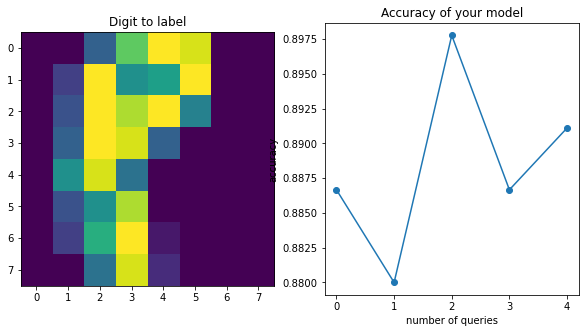

Which digit is this?
6


In [23]:
accuracy_scores = [learner.score(X_test, y_test).tolist()]

for i in range(n_queries): 
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Digit to label')
    plt.imshow(query_inst. reshape(8, 8))
    plt.subplot(1, 2, 2)
    plt.title('Accuracy of your model')
    plt.plot(range(i+1), accuracy_scores)
    plt.scatter(range(i+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    display.display(plt.gcf())
    plt.close('all')
    
    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

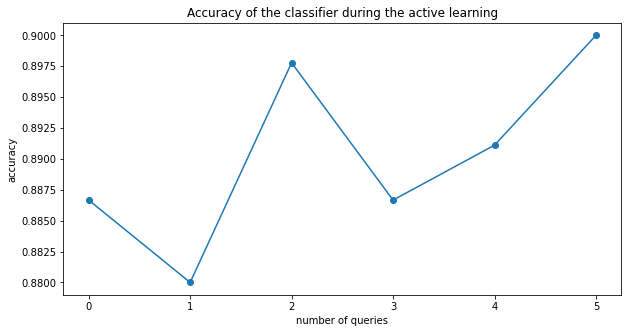

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy of the classifier during the active learning')
plt.plot(range(n_queries+1), accuracy_scores)
plt.scatter(range(n_queries+1), accuracy_scores)
plt.xlabel('number of queries')
plt.ylabel('accuracy')
plt.show()